## Game Problem statement
Simulate the working of TicTacToe game extended to three players with coins ‘X’,
‘O’ and ‘T’ with the below sample larger game board of dimension 6*6. The first player to
match any four consecutive coins in the same row or same column or same diagonal wins.
A sample state of the game board is given below for reference. Your program must start from
empty configuration.
"
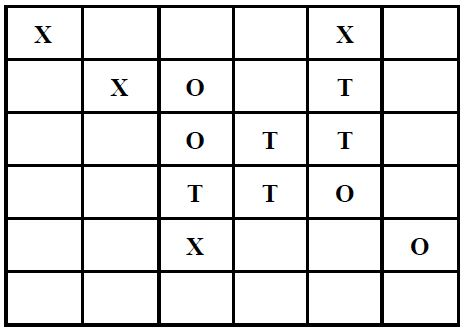

- a. You are free to choose your own static evaluation function. Justify your choice of
static evaluation value design and explain with a sample game state. Do not
use any machine learning model for the evaluation function.
- b. Similar to the virtual lab example, one of the players must be a human ie., it must get
dynamic inputs from us. The other two players must be simulated using the
program.
- c. Implement Python code for the design under part a, using Minimax Algorithm.


# Things to follow

1. Use appropriate data structures to represent the game using python libraries
2. Provide proper documentation
3. Create neat solution without error during game playing

### Coding begins here

### Static Evaluation Value or Utility Code Design - Explain :

For Tic-Tac-Toe, the function could be as simple as returning +1 if the player wins, -1 if the computer wins, or 0 otherwise. However, simple evaluation function may require deeper search and with 6x6 Tic-Tac-Toe it may result in algorithm to get stuck for a long time.

A better evaluation function for Tic-Tac-Toe is:

+100 for each 4-in-a-line for player (X)
<br>-100 for each 4-in-a-line for computer (O,T)

+20 for each 3-in-a-line (with 1 empty cell) for player (X)
<br>-20 for each 3-in-a-line (with 1 empty cell) for computer (O,T)

+10 for each 2-in-a-line (with 2 empty cells) for player (X)
<br>-10 for each 2-in-a-line (with 2 empty cells) for computer (O,T)

+5 for each 1-in-a-line (with 3 empty cells) for player (X)
<br>-5 for each 1-in-a-line (with 3 empty cells) for computer (O,T)

#### Static Evaluation Value or Utility Code Design - Implement :

In [1]:
!pip install termcolor  

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install colorama

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Code block
# Initiate Python Libraries
import math
import random
from termcolor import colored, cprint
from colorama import Fore, Style

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Defining Class - TicTacToe for 3 players (1 - Human and 2 - Computers) using a 6x6 board

In [5]:
class TicTacToe3:
    def __init__(self):
        self.board = ['-'] * 36  # 6x6 empty board
        
        '''
        self.board = ['X','-','-','-','X','-',
                      '-','X','O','-','T','-',
                      '-','-','O','T','T','-',
                      '-','-','T','T','O','-',
                      '-','-','X','-','-','O',
                      '-','-','-','-','-','-']  # 6x6 empty board
        '''
        
        # Sequence of play turns is X followed by O and then T ,  But first player is random
        self.players = ['T', 'X', 'O' ]  
        self.current_player = random.choice(self.players)  # First player is random
        #self.current_player = 'T'
        self.winner = 'Tie'  # To represent the winner of the game
        
        # Possible winning diagonals are defined as below:
        self.DIAGONALS = [[0, 7, 14, 21, 28, 35], 
                          [1, 8, 15, 22, 29], 
                          [2, 9, 16, 23], 
                          [6, 13, 20, 27, 34],
                          [12, 19, 26, 33], 
                          [5, 10, 15, 20, 25, 30], 
                          [11, 16, 21, 26, 31], 
                          [17, 22, 27, 32],
                          [4, 9, 14, 19, 24], 
                          [3, 8, 13, 18]]

    # Function to display the TicTacToe 6x6 board:
    def display_board(self):
        cprint(Fore.RED + "    1   2   3   4   5   6")
        print(Fore.BLACK + "   ------------------------")
        print("1 | ", end="")  # To represent the first row number of board

        for i in range(0, 36):
            if self.board[i] == 'X':
                cprint(Fore.BLUE + 'X |', end=" ")  # X to be displayed blue
            elif self.board[i] == 'O':
                print(Fore.GREEN + 'O |', end=" ")  # O in green
            elif self.board[i] == 'T':
                print(Fore.MAGENTA + 'T |', end=" ")  # T in magenta
            else:
                print(Fore.BLACK + "  |", end=" ")

            if i % 6 == 5:
                print()
                print(Fore.BLACK + "   ------------------------")

                if i < 35:
                    print(((i + 1) // 6) + 1, "| ", end="")

        print(Style.NORMAL)
        print(Fore.BLACK)
    # Function to make a move (By Human / Computer)
    def make_move(self, move, player):
        self.board[move] = player
        
    # Function to find valid move
    def get_valid_moves(self):
        return [i for i in range(36) if self.board[i] == '-']

    # Function to return winner state (True/False):
    def get_winner(self):
        # Search a winner horizontally:
        for i in range(0, 36, 6):
            row = self.board[i:i + 6]
            row = "".join(row)
            if 'XXXX' in row or 'OOOO' in row or 'TTTT' in row:
                return True
            
        # Search a winner vertically:
        for i in range(6):
            col = [self.board[j] for j in range(i, 36, 6)]
            col = "".join(col)
            if 'XXXX' in col or 'OOOO' in col or 'TTTT' in col:
                return True

        # Search a winner diagonally:
        for diag in self.DIAGONALS:
            ext = ""
            for i in diag:
                ext = ext + (self.board[i])
            if 'XXXX' in ext or 'OOOO' in ext or 'TTTT' in ext:
                return True
    
        # Return False in case no winner is found at the moment:
        return False

    # Function to define Minimax algorithm:
    def minimax(self, depth, player):
        if player == 'X':
            best_val = [-1, -math.inf]
        else:
            best_val = [-1, math.inf]
        if depth == 0 or self.get_winner():
            score = self.evaluate_board()
            return [-1, score]
        for move in self.get_valid_moves():
            self.make_move(move, player)
            if player == 'X':
                score = self.minimax(depth - 1, 'O')
            else:
                score = self.minimax(depth - 1, 'T' if player == 'O' else 'X')
            self.make_move(move, '-')
            score[0] = move
            
            if player == 'X':
                if score[1] > best_val[1]:
                    best_val = score        # best_val represents alpha | score represents beta
            else:
                if score[1] < best_val[1]:
                    best_val = score        # best_val represents beta | score represents alpha
 
        return best_val   # Min or Max Score

    # Function to Evaluate board score:
    def evaluate_board(self):
        score = 0
        for i in range(0, 36, 6):
            row = self.board[i:i + 6]
            score += self.get_score(row)
        for i in range(6):
            col = [self.board[j] for j in range(i, 36, 6)]
            score += self.get_score(col)
        for diag in self.DIAGONALS:
            score += self.get_score([self.board[j] for j in diag])
        return score

    # Function to define Static Evaluation Value:
    def get_score(self, row):
        score = 0

        temp = ""
        for i in row:
            temp = temp + i

        if 'XXXX' in temp:
            score += 100
        elif 'OOOO' in temp:
            score -= 100
        elif 'TTTT' in temp:
            score -= 100
        elif 'XXX-' in temp or '-XXX' in temp or 'X-XX' in temp or 'XX-X' in temp:
            score += 20
        elif 'OOO-' in temp or '-OOO' in temp or 'O-OO' in temp or 'OO-O' in temp:
            score -= 20
        elif 'TTT-' in temp or '-TTT' in temp or 'T-TT' in temp or 'TT-T' in temp:
            score -= 20
        elif 'XX--' in temp or '--XX' in temp or 'X--X' in temp or 'X-X-' in temp or '-X-X' or '-XX-' in temp:
            score += 10
        elif 'OO--' in temp or '--OO' in temp or 'O--O' in temp or 'O-O-' in temp or 'O-O-' or '-OO-' in temp:
            score -= 10
        elif 'TT--' in temp or '--TT' in temp or 'T--T' in temp or 'T-T-' in temp or 'T-T-' or '-TT-' in temp:
            score -= 10
        elif 'X---' in temp or '-X--' in temp or '--X-' in temp or '---X' in temp:
            score += 5
        elif 'O---' in temp or '-O--' in temp or '--O-' in temp or '---O' in temp:
            score -= 5
        elif 'T---' in temp or '-T--' in temp or '--T-' in temp or '---T' in temp:
            score -= 5
        return score

    # Function to Start the game with Random sequence by taking Dynamic input from Human:
    def play(self):
        while not self.get_winner() and '-' in self.board:
            strtemp = ""
            if self.current_player == 'X':
                strtemp = input("X : Enter your move position (Row,Col)")
                if "," not in strtemp:
                    print('Please retry with right input , mandatory')
                    continue
                try:
                    row, col = strtemp.split(",")[0],strtemp.split(",")[1]
                    move = ((int(row) - 1) * 6) + (int(col) - 1)
                except Exception as e: 
                    print('Not a numeric input. Error:\n',str(e))
                    continue

                wrongmove = False
                while move not in self.get_valid_moves():
                    print("Invalid move ")
                    wrongmove = True
                    break
                if wrongmove:
                    continue
                self.make_move(move, self.current_player)
            else:
                # Here Depth is taken as 2 to have a balance between computational complexity and effectiveness of algorithm
                move = self.minimax(2, self.current_player)[0]
                row, col = (move // 6 + 1), (move % 6 + 1)     # Definition of board cells (0 to 35)
                if row>=1 and col>=1:
                    print('Automatic Agent Move of ',self.current_player , '@', row,',',col)
                    self.make_move(move, self.current_player)
                else:
                    try:
                        move = (self.board).index('-')
                        row, col = (move // 6 + 1), (move % 6 + 1)
                        print('Automatic Agent Move of', self.current_player, '@', row,',',col)
                        self.make_move(move, self.current_player)
                    except:
                        pass

            self.winner = self.current_player
            self.display_board()
            self.current_player = self.players[(self.players.index(self.current_player) + 1) % 3]

        if "-" not in self.board:
            if not self.get_winner():
                print("!! Its a TIE !! ")
                exit
            else:
                if self.winner == 'X':
                    print("Congratulations X :  You are the winner")
                else:
                    print(self.winner, "Is the Winner")
        else:
            if self.winner == 'X':
                print("Congratulations X :  You are the winner")
            else:
                print(self.winner, "Is the Winner")  

### Terminal State / Game Ending (Win/Loss/Draw):  Design 

The TicTacToe class contains the game logic, including the game board, players, and the current player. ,
<br>The display_board method prints the current state of the game board. 
<br>The make_move method updates the board with a player's move. 
<br>The get_valid_moves method returns a list of valid moves that can be made. 
<br>The get_winner method checks if there is a winner on the board. 
<br>The minimax method is the AI player using the Minimax algorithm to determine the best move to make. 
<br>The evaluate_board method scores each row, column, and diagonal on the board. 
<br>The get_score method scores a single row on the board. 
<br>The play method runs the game and prompts the human player for input, while using the Minimax algorithm for the AI player's move


### Terminal State / Game Ending (Win/Loss/Draw):  Implementation

To play the game, simply create an instance of the TicTacToe class and call the play method. 
<br>The game will start and prompt the human player for input. 
<br>The AI player will then make its move using the Minimax algorithm. 
<br>The game will continue until there is a winner or a tie.


## Dynamic Input Design : Explain 

### Proper Prompt to the User for Dynamic Input & Handling incorrect inputs - Implement

In [6]:
# Start the GAME
game = TicTacToe3()
print('Welcome To Tic-Tac-Toe')
print('You are playing starting with a Empty 6x6 Board, with 2 AI Bots')

# Start from 6x6 emtpy board:
game.display_board()
game.play()

Welcome To Tic-Tac-Toe
You are playing starting with a Empty 6x6 Board, with 2 AI Bots
    1   2   3   4   5   6
   ------------------------
1 |   |   |   |   |   |   | 
   ------------------------
2 |   |   |   |   |   |   | 
   ------------------------
3 |   |   |   |   |   |   | 
   ------------------------
4 |   |   |   |   |   |   | 
   ------------------------
5 |   |   |   |   |   |   | 
   ------------------------
6 |   |   |   |   |   |   | 
   ------------------------


Automatic Agent Move of  O @ 1 , 1
    1   2   3   4   5   6
   ------------------------
1 | O |   |   |   |   |   | 
   ------------------------
2 |   |   |   |   |   |   | 
   ------------------------
3 |   |   |   |   |   |   | 
   ------------------------
4 |   |   |   |   |   |   | 
   ------------------------
5 |   |   |   |   |   |   | 
   ------------------------
6 |   |   |   |   |   |   | 
   ------------------------


Automatic Agent Move of  T @ 1 , 2
    1   2   3   4   5   6
   ------------------

### Any Inference / Documentation

The 6x6 grid based Tic-Tac-Toe problem is implemented successfully in Python with 3 players and using minimax algorithm with a depth constraint of 2. The 6x6 grid allows for more potential winning combinations, making the game more challenging and exciting. Additionally, with three players, there is more strategy involved in trying to block opponents and create opportunities for oneself.  
Future enhancements can be made in such a way that, we can give an option to the end user to choose the complexity level of AI agents and then play the game. This can be done by creating different scoring functions corresponding to the level of difficulty chosen by the user.
